In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Generate data
x = np.arange(1,5,0.01)
n = len(x)  # Number of data points

The idea is that we generate a set of random data points given the mean value for each $x$. That is

$$
y = \text{mean}(x) + \text{random_number}
$$

It is sane to think that we generate the random number using a normal distribution centered at zero with a standard deviation of $0.5$.

In this example, the mean value will be given by the following non-linear function:

$$
\text{mean}(x) = 2 + 0.2x + 2x^{0.4} + 0.5\cos{4.5x}
$$

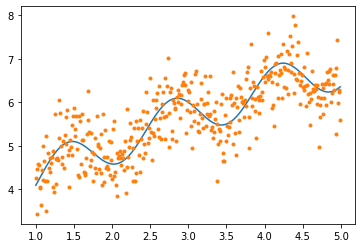

In [3]:
# Plotting mean and generating random data
mean = 2 + 0.2*x + 2*x**0.4 + 0.5*np.cos(4.5*x)
plt.plot(x, mean)
y = mean + np.random.normal(0, 0.5, size=n)
plt.plot(x, y, '.')

Now we try fitting a linear regression model to the data, which is a model that lacks flexibility.

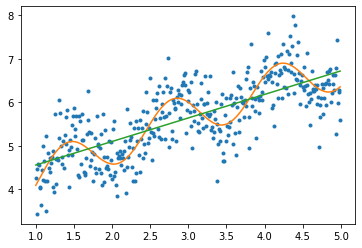

In [4]:
fit = np.polyfit(x,y,1)
plt.plot(x, y, '.')
plt.plot(x, mean)
plt.plot(x, fit[0]*x + fit[1])

Now we try with a more flexible/smoother estimator model, which computes the mean value over some ball of radius $h$ around the input point $x$. That is, it takes all the output variables inside the range $(x-h,x+h)$ and compute the mean value of all the $y$'s in that interval, for every/each $x$.

Note that $h$ in this case is a measure of flexibility of the model, the lower $h$ is the more flexible the model.

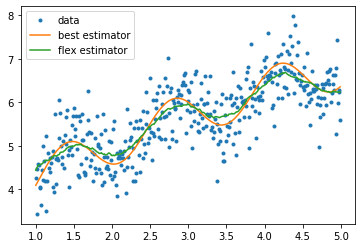

In [5]:
def flex_estimator(x, y, h):
    """
    Generates a estimator computing the mean of the y values corresponding
    to the interval (x-h, x+h).
    """
    result = []
    for i in range(len(x)):
        sum1 = 0
        sum2 = 0
        for j in range(len(x)):
            if x[j]<(x[i]+h) and x[j]>(x[i]-h):
                sum1 += y[j]
                sum2 += 1
        y_mean = sum1/sum2
        result.append(y_mean)
    return result

h = 0.3
plt.plot(x, y, '.', label="data")
plt.plot(x, mean, label="best estimator")
plt.plot(x, flex_estimator(x,y,h), label="flex estimator")
plt.legend()

Now we try with a smaller sample and see the effects in our flexible model.

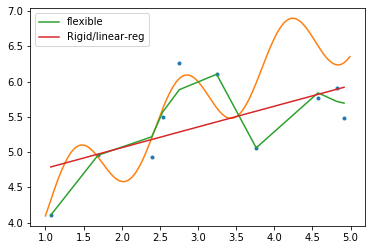

In [6]:
n_small = 10  # Number of data points we want

# Choose n_small random numbers in the input range (1,5)
x_small = np.random.uniform(low=1, high=5, size=n_small)
x_small = np.sort(x_small)  # Have to sort to get good plot
mean_small = 2 + 0.2*x_small + 2*x_small**0.4 + 0.5*np.cos(4.5*x_small)
y_small = mean_small + np.random.normal(0, 0.5, size=n_small)

# Plot results
plt.plot(x_small, y_small, '.')
plt.plot(x, mean)

plt.plot(x_small, flex_estimator(x_small, y_small, h), label="flexible") # Flexible

# Linear/rigid model
fit_small = np.polyfit(x_small, y_small, 1)
plt.plot(x_small, fit_small[0]*x_small+fit_small[1], label="Rigid/linear-reg")

plt.legend()

One can visualize that a more flexible model seems to give off predictions for smaller sample data, even worse than the linear non-flexible model.

TODO: Compute the error (MSE?) and see how it varies with sample size and flexibility h.